# DSA Assignment 5: Classification
- Aravind A

## 1) Read the dataset to python environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#!pip install xlrd==1.2.0

In [3]:
data = pd.read_excel("iris_data_assig5.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2) Do the necessary pre-processing steps


In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

- Handling missing values

In [9]:
# Percentage of missing values in each column
data.isna().sum()/ data.shape[0]*100

SL                4.666667
SW                4.000000
PL                4.000000
PW                0.000000
Classification    0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


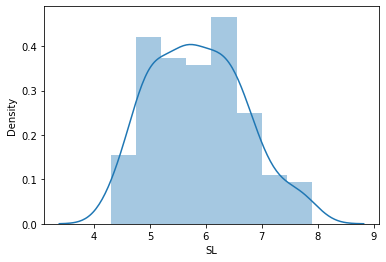

In [10]:
sns.distplot(data['SL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


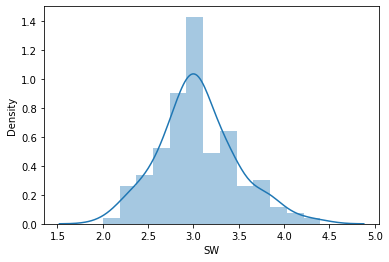

In [11]:
sns.distplot(data['SW'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


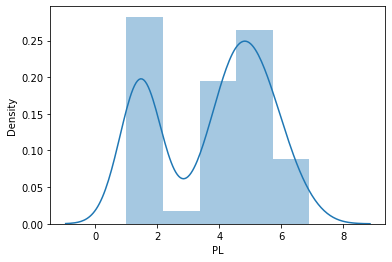

In [13]:
sns.distplot(data['PL'])


###  fill missing values in SL and PL columns with median of respective columns

In [14]:
data['SL'] = data['SL'].fillna(data['SL'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [15]:
print(data['SL'].isna().sum(), data['PL'].isna().sum())

0 0


### fill missing values in SW column with mean value of that column

In [16]:
data['SW'] = data['SW'].fillna(data['SW'].mean())

In [17]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.049306,3.780000,1.198667
std,0.808567,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:

data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

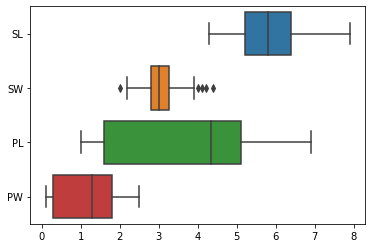

In [19]:
sns.boxplot(data= data, orient='h')
plt.show()

### handling outliers in SW column

In [20]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1, Q2, Q3)

2.8 3.0 3.25


In [21]:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",lower_limit)
print("Upper limit is: ",upper_limit)

IQR is :  0.4500000000000002
Lower Limit is : 2.1249999999999996
Upper limit is:  3.9250000000000003


In [22]:
data[(data['SW'] > 3.93) ^ (data['SW'] < 2.12)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


- since the dataset is small and the number of outlier data is small, outliers need not be dropped.

## 3) Find out which classification model gives the best result 


- traget column is Classification

### Encoding Classification column

 - LabelEncoder

In [23]:
#!pip install scikit-learn

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
#Fit and transform to numeric
data['Classification'] = le.fit_transform(data['Classification'])

In [27]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

#### split the dataset

In [29]:
# creating x and y
X = data.drop('Classification',axis=1)
y = data['Classification']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=142)

### Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [33]:

lr= LogisticRegression()


In [34]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.85      0.85      0.85        13
           2       0.90      0.90      0.90        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



- Accuracy score for Logistic Regression

In [38]:
accuracy_score(y_test, y_pred_lr)

0.8666666666666667

### K-Nearest Neighbor (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
metrics = {}
for k in range(1, 20, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_KNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_KNN) 
    metrics.update({k: acc}) 

In [42]:
metrics

{1: 0.9333333333333333,
 3: 0.9333333333333333,
 5: 0.9333333333333333,
 7: 0.9333333333333333,
 9: 0.9,
 11: 0.9333333333333333,
 13: 0.9,
 15: 0.9,
 17: 0.9,
 19: 0.9}

- take number of neighbors = 11

In [43]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        10

    accuracy                           0.93        30
   macro avg       0.96      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



 - accuracy score for KNN

In [45]:
accuracy_score(y_test, y_pred_knn)

0.9333333333333333

### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=4)

In [49]:
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.92      0.92        13
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



- accuracy score for Decision Tree Classifier


In [51]:
accuracy_score(y_test, y_pred_dt)

0.9333333333333333

In [52]:
dt1 = DecisionTreeClassifier(max_depth=5)

In [53]:
dt1.fit(X_train,y_train)
y_pred_dt1 = dt.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_dt1)

0.9333333333333333

**Decision Tree and KNN classifiers give better accuracy score compared to Logistic Regression**